In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('student_score.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

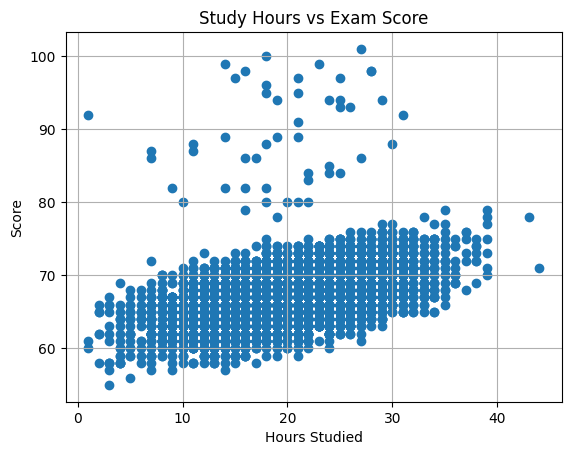

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Hours_Studied'], y=df['Exam_Score'])
plt.title('Study Hours vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [4]:
# Encode categorical features
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

df['Parental_Involvement'] = df['Parental_Involvement'].map(mapping)
df['Motivation_Level'] = df['Motivation_Level'].map(mapping)
df['Peer_Influence'] = df['Peer_Influence'].map(mapping)

In [5]:
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Parental_Involvement', 'Motivation_Level', 'Peer_Influence']
X = df[features]
y = df['Exam_Score']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.04
MSE: 4.32
R² Score: 0.69


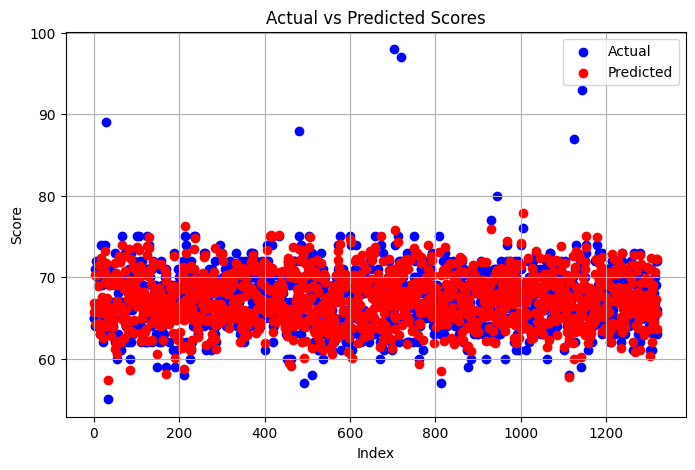

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

y_pred_poly = poly_model.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"Polynomial MAE: {mae_poly:.2f}")
print(f"Polynomial MSE: {mse_poly:.2f}")
print(f"Polynomial R² Score: {r2_poly:.2f}")

Polynomial MAE: 1.06
Polynomial MSE: 4.35
Polynomial R² Score: 0.69


In [11]:
print(f"\nModel Comparison:")
print(f"Linear Regression R²: {r2:.2f}")
print(f"Polynomial Regression R²: {r2_poly:.2f}")


Model Comparison:
Linear Regression R²: 0.69
Polynomial Regression R²: 0.69


In [12]:
import pickle
with open("poly_model.pkl", "wb") as f:
    pickle.dump(poly_model, f)
with open("poly_transformer.pkl", "wb") as f:
    pickle.dump(poly, f)
    
print("Model saved successfully!")

Model saved successfully!
